In [1]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [2]:
from time import time

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.patheffects as PathEffects

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from sklearn import manifold, datasets
import pandas as pd

liste_dataset=["Atom","Chainlink","EngyTime","GolfBall","Hepta","Lsun","Target","Tetra","TwoDiamonds","WingNut"]

Dataset Atom
the explained variance ration is : 
[0.68276912 0.31723088]
PCA singular values are :
[37.2160289  25.36768416]

 
 

Dataset Chainlink
the explained variance ration is : 
[0.45360167 0.27803167]
PCA singular values are :
[677.58189667 530.48316903]

 
 

Dataset EngyTime
the explained variance ration is : 
[0.61452849 0.19378731]
PCA singular values are :
[27.67051224 15.5384913 ]

 
 

Dataset GolfBall
the explained variance ration is : 
[0.5921797 0.4078203]
PCA singular values are :
[111.39589994  92.44360336]

 
 

Dataset Hepta
the explained variance ration is : 
[0.3354002 0.3354002]
PCA singular values are :
[36.63702629 36.6370262 ]

 
 

Dataset Lsun
the explained variance ration is : 
[0.3473685  0.33716428]
PCA singular values are :
[24.45370578 24.09185532]

 
 

Dataset Target
the explained variance ration is : 
[0.64950666 0.35049334]
PCA singular values are :
[29.2783454 21.5077317]

 
 

Dataset Tetra
the explained variance ration is : 
[0.50863063 0.49136

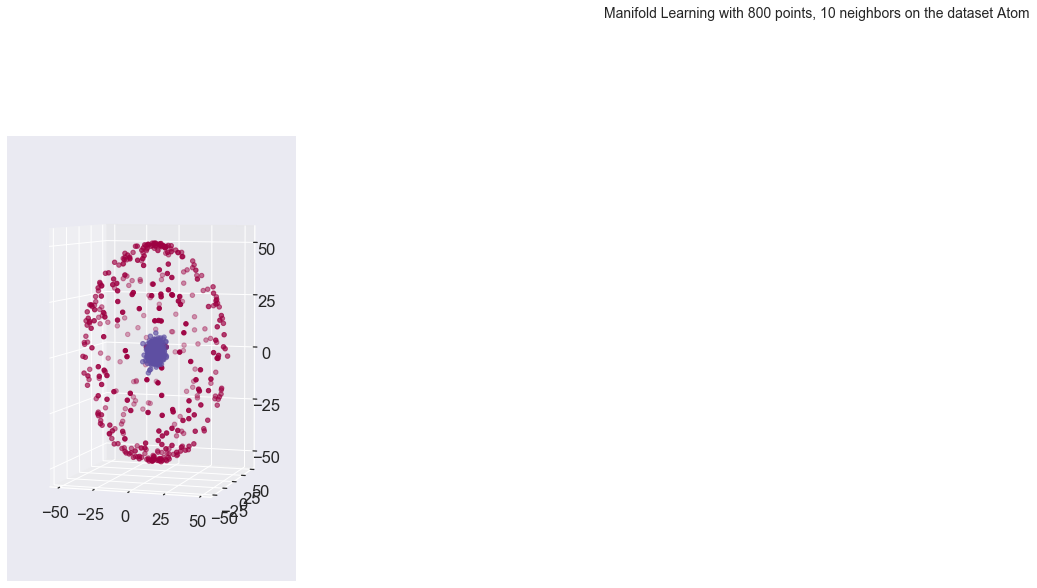

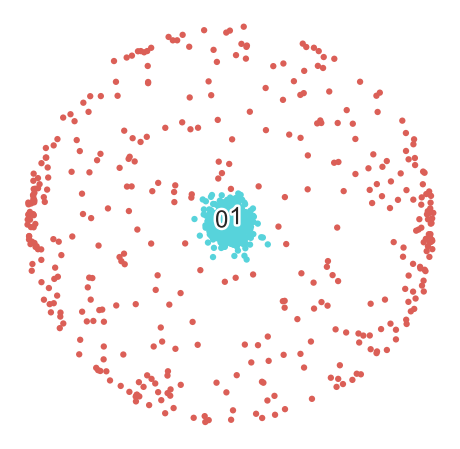

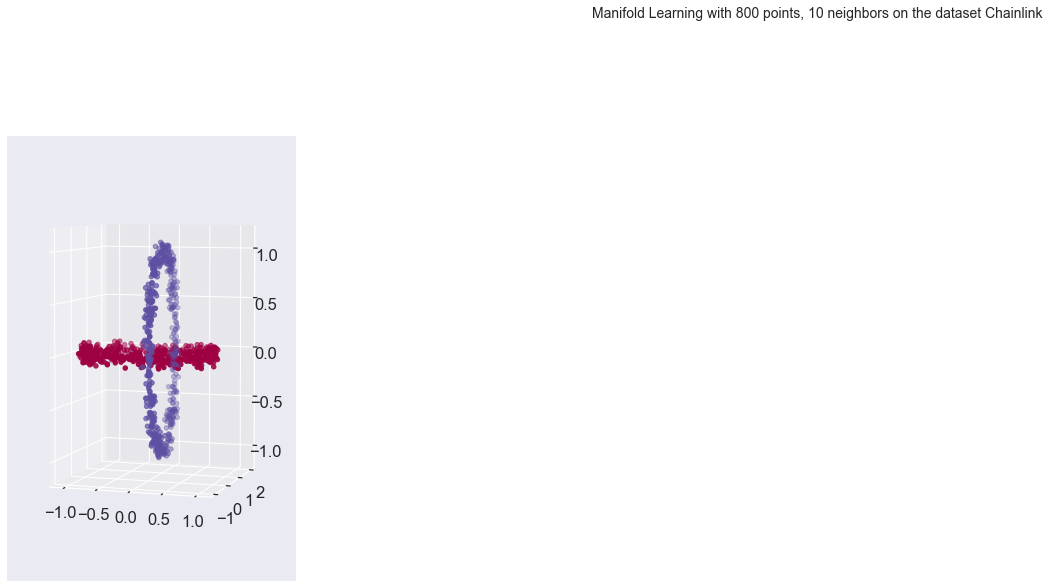

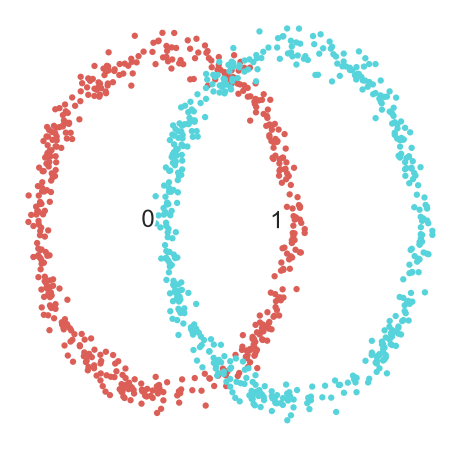

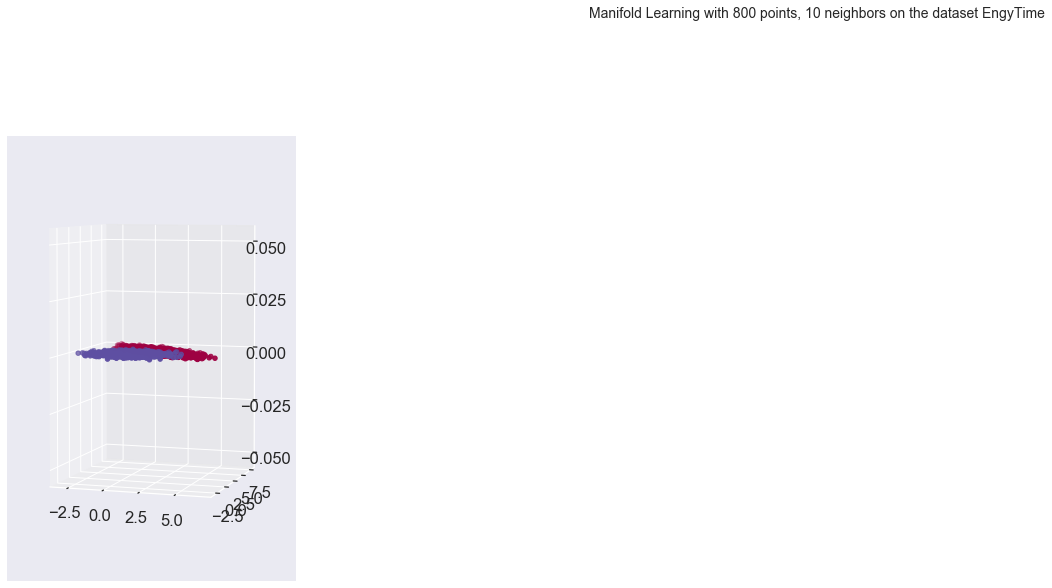

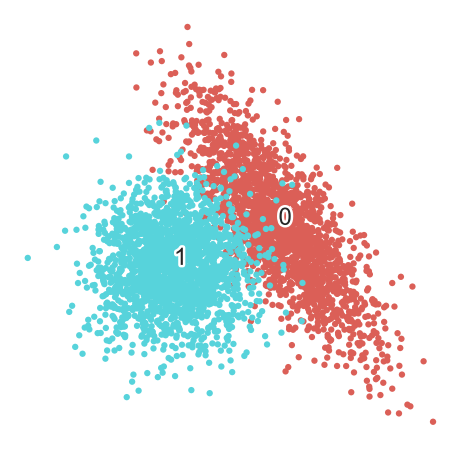

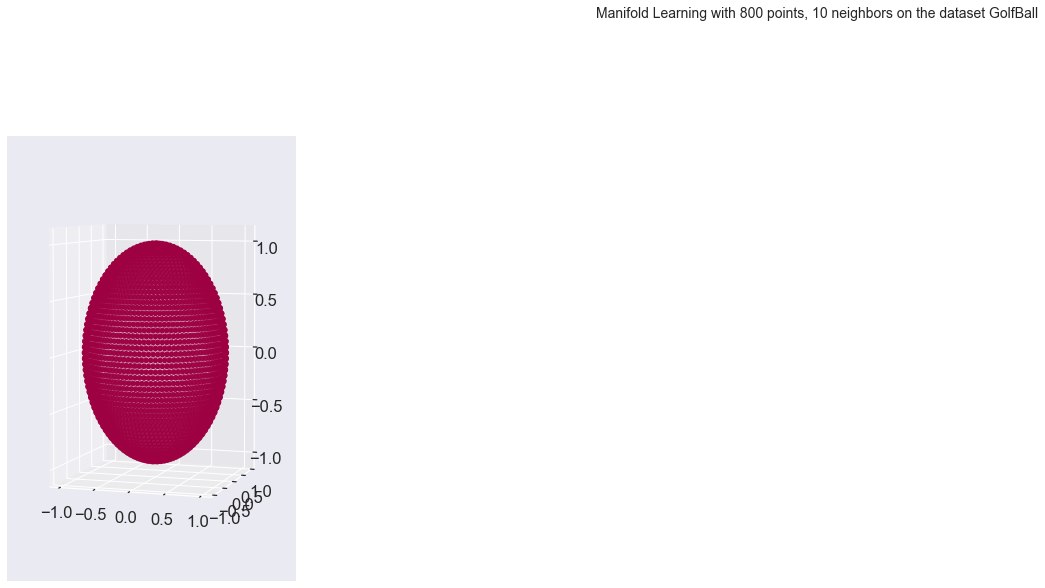

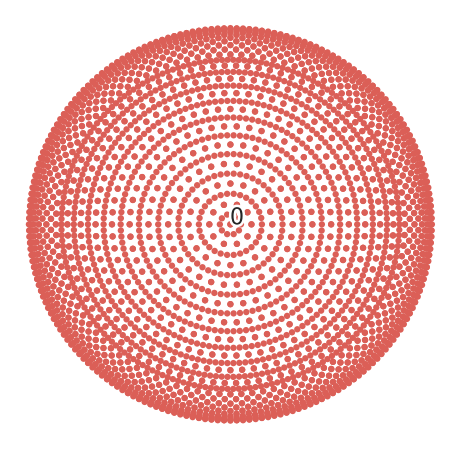

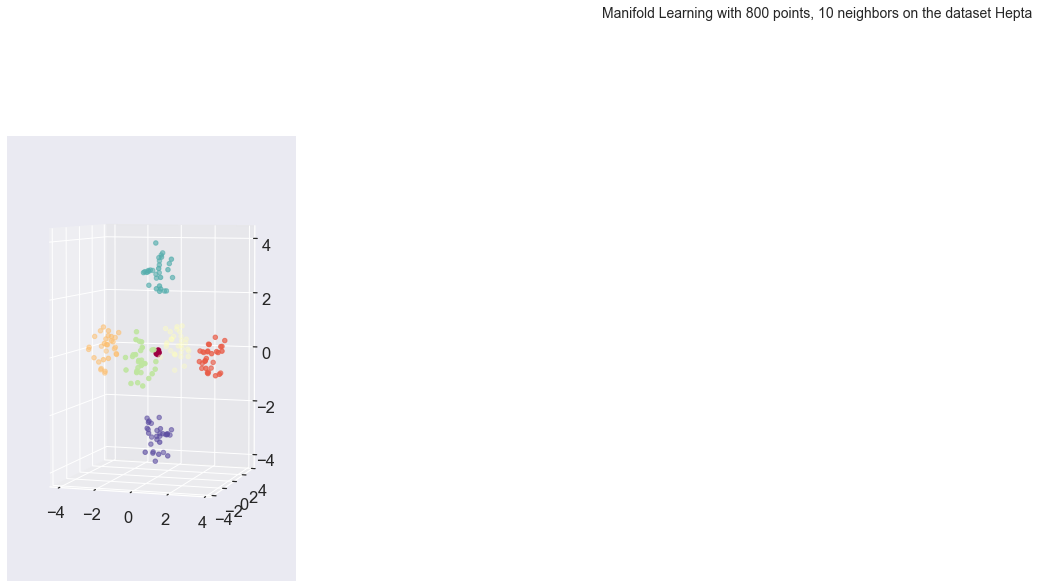

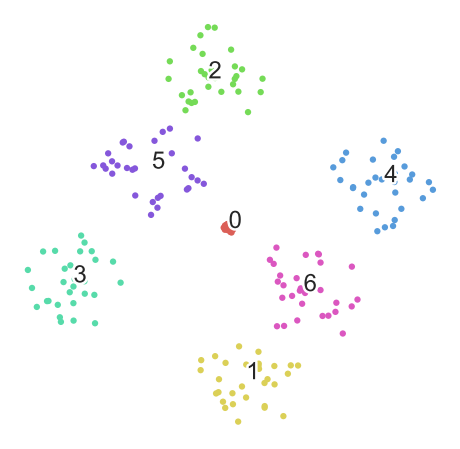

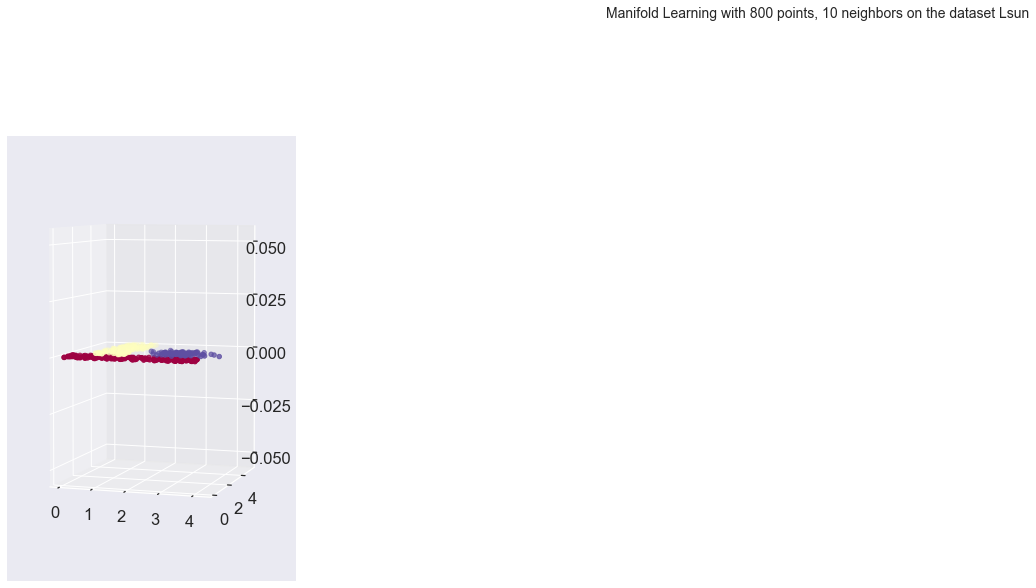

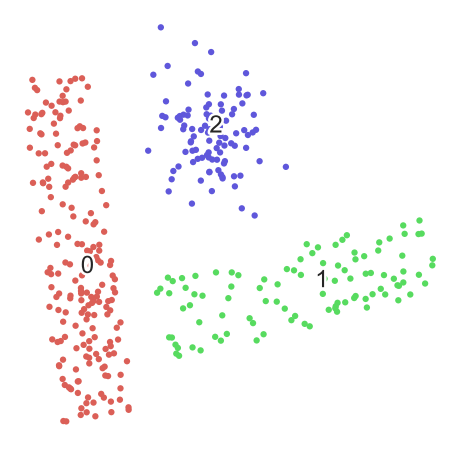

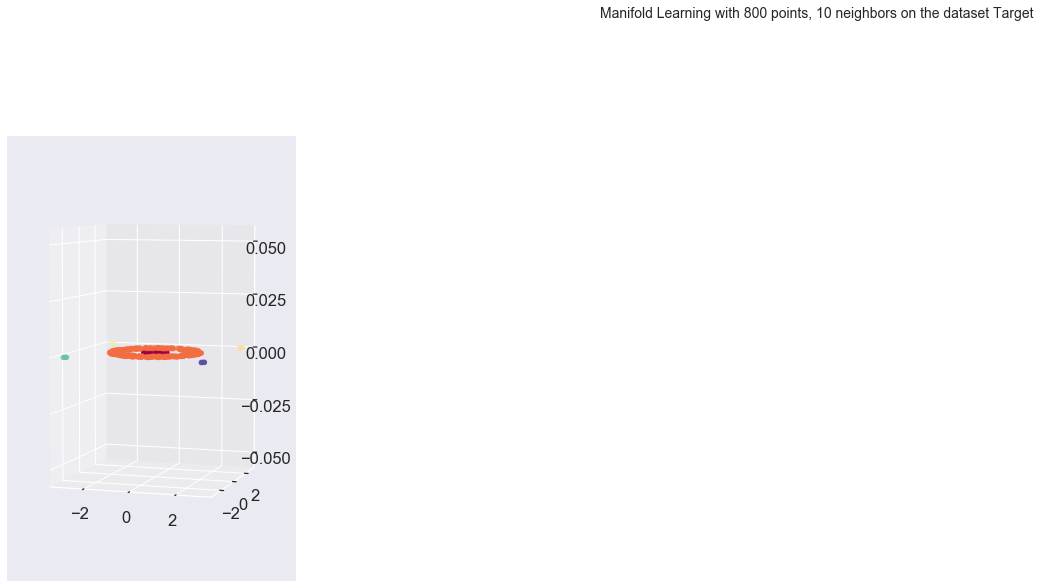

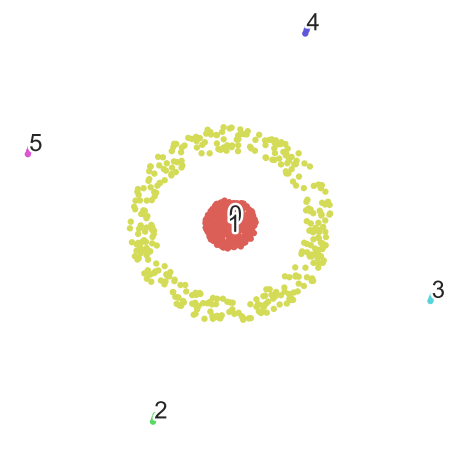

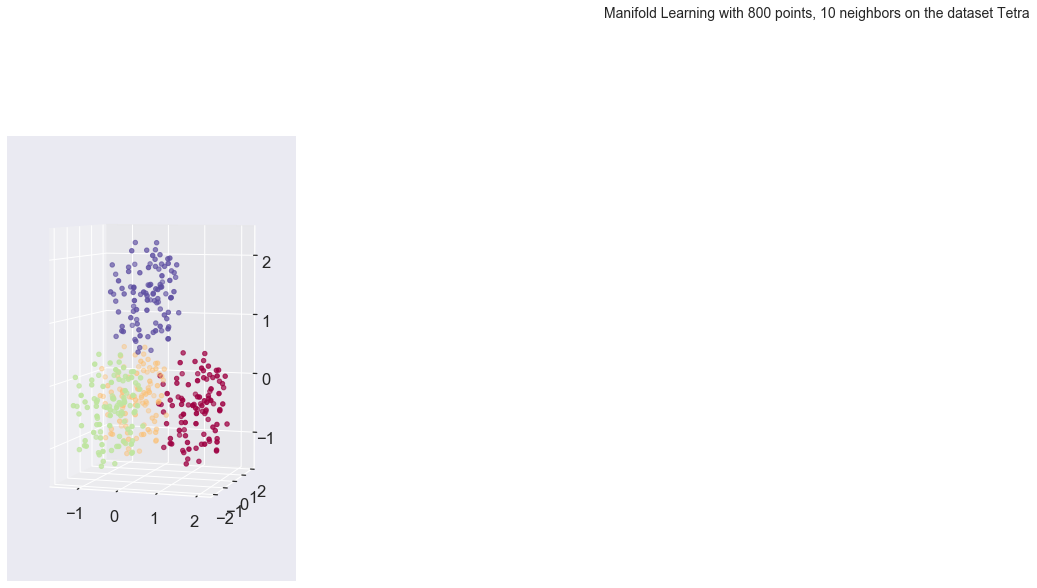

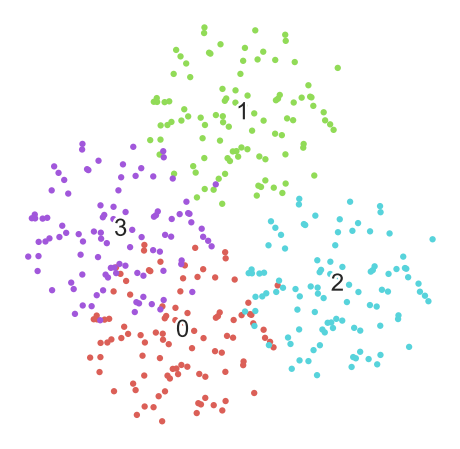

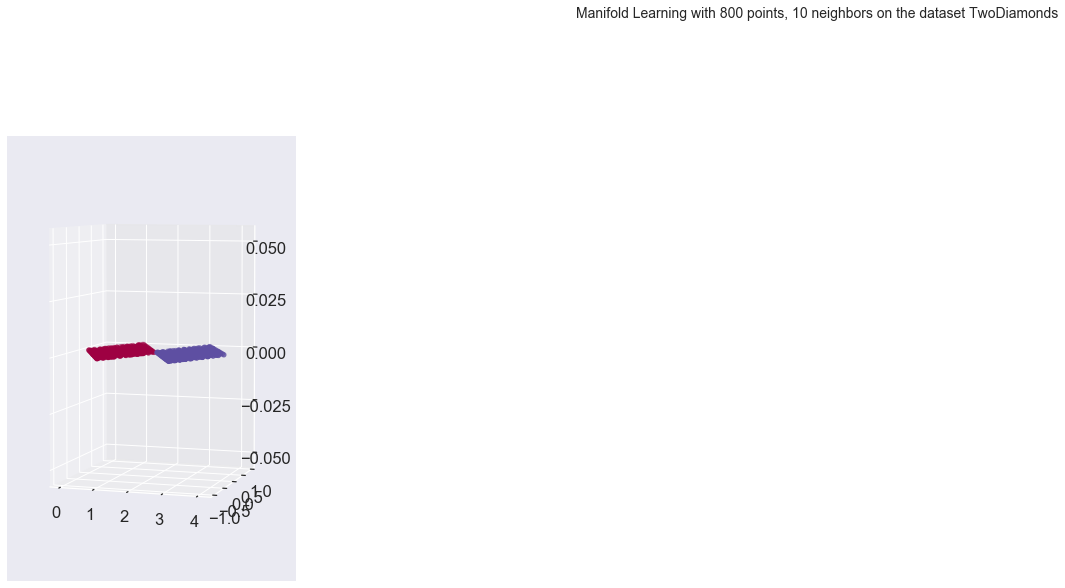

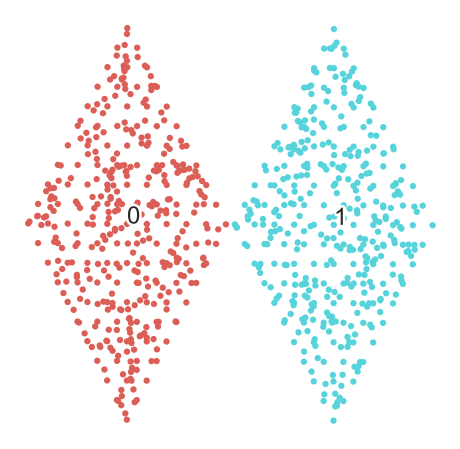

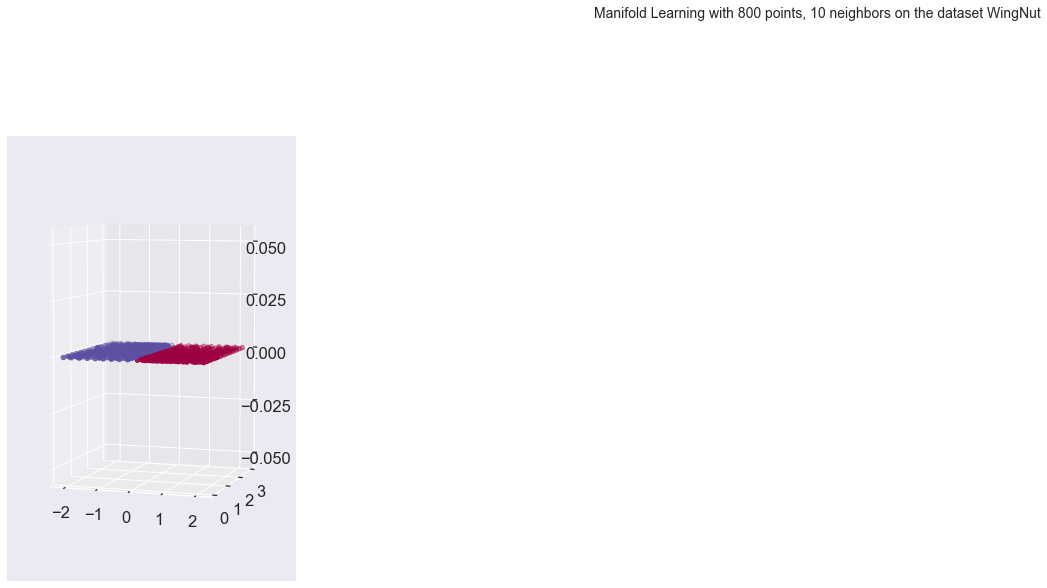

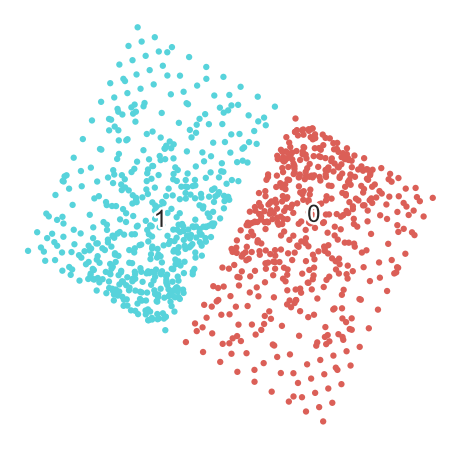

In [84]:
for nom in liste_dataset:
    chemin='D:/m2/reduc/{}.csv'.format(nom)
    
    dataset=pd.read_csv(chemin) 
    if(dataset.shape[1]==4):
        X=dataset.iloc[:,1:3]
        label=dataset.iloc[:,3].values
        label=label-1
    else:
        X=dataset.iloc[:,1:4]
        label=dataset.iloc[:,4].values
        label=label-1
        

    n_neighbors=10
    n_components=2
    fig = plt.figure(figsize=(30, 18))
    
    plt.suptitle("Manifold Learning with %i points, %i neighbors on the dataset %s"
             % (800, n_neighbors,nom), fontsize=14)
    print("Dataset %s" % nom)
    print("the explained variance ration is : ")
    print(pca.explained_variance_ratio_)
    print("PCA singular values are :")
    print(pca.singular_values_)
    print("\n \n \n")


    ax = fig.add_subplot(251, projection='3d')
    if(dataset.shape[1]==4):
        ax.scatter(X.iloc[:,0].values, X.iloc[:,1].values, c=label, cmap=plt.cm.Spectral)
    else:
         ax.scatter(X.iloc[:,0].values, X.iloc[:,1].values, X.iloc[:,2].values, c=label, cmap=plt.cm.Spectral)   
    ax.view_init(4, -72)
    t0 = time()
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X)
    t1 = time()

    
    if(dataset.shape[1]==4):
        pca_df = pd.DataFrame(columns = ['pca1','pca2'])
        pca_df['pca1'] = pca_result[:,0]
        pca_df['pca2'] = pca_result[:,1]
    else:
        pca_df = pd.DataFrame(columns = ['pca1','pca2'])
        pca_df['pca1'] = pca_result[:,0]
        pca_df['pca2'] = pca_result[:,1]
  
    


    top_two_comp = pca_df[['pca1','pca2']]
    fashion_scatter(top_two_comp.values,label)


standard: 0.001 sec
standard: 0.001 sec
standard: 0.001 sec
standard: 0.002 sec
standard: 0.001 sec
standard: 0.001 sec
standard: 0.0021 sec
standard: 0.001 sec
standard: 0.00097 sec
standard: 0.001 sec


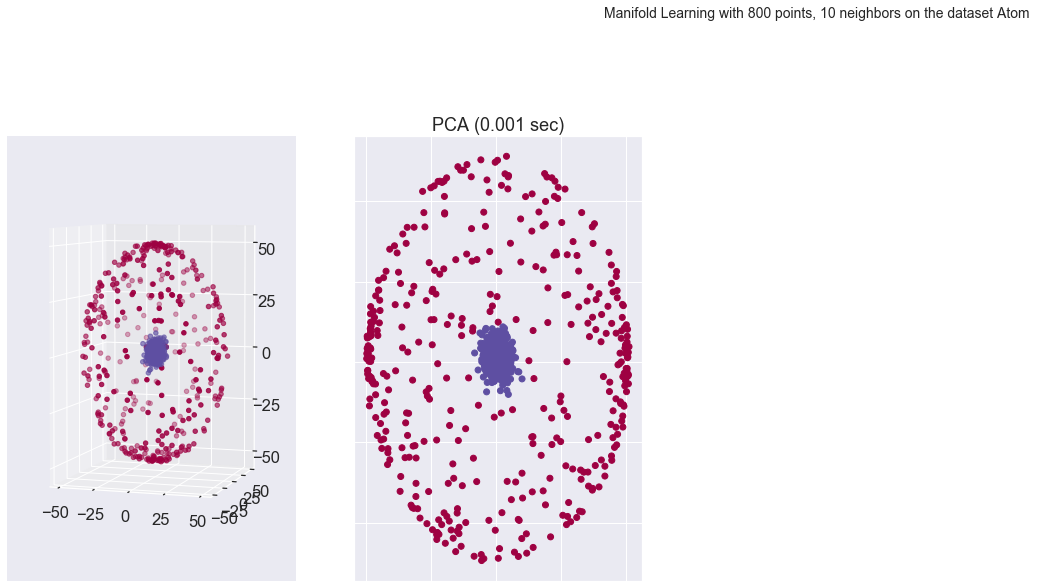

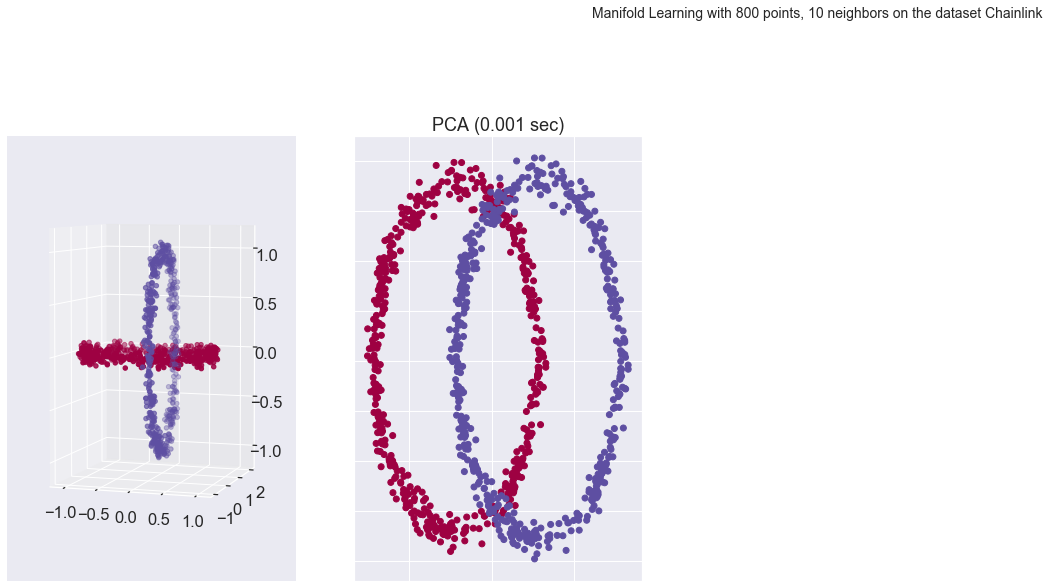

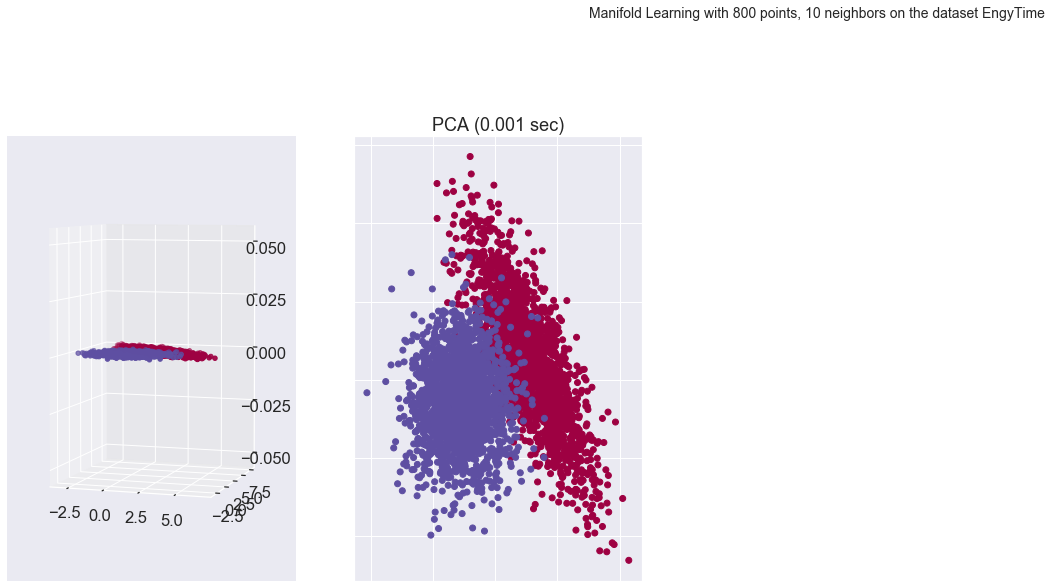

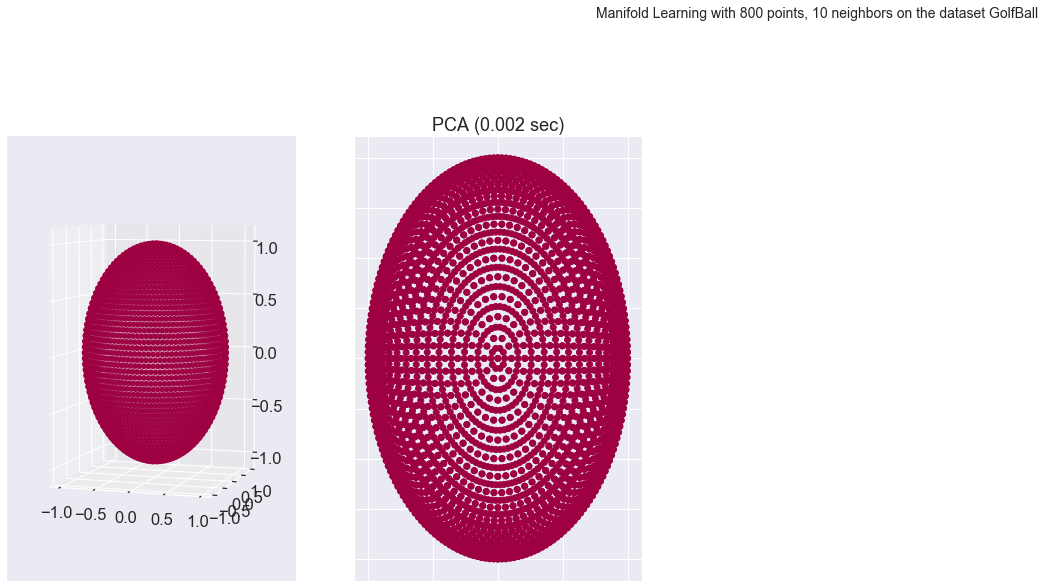

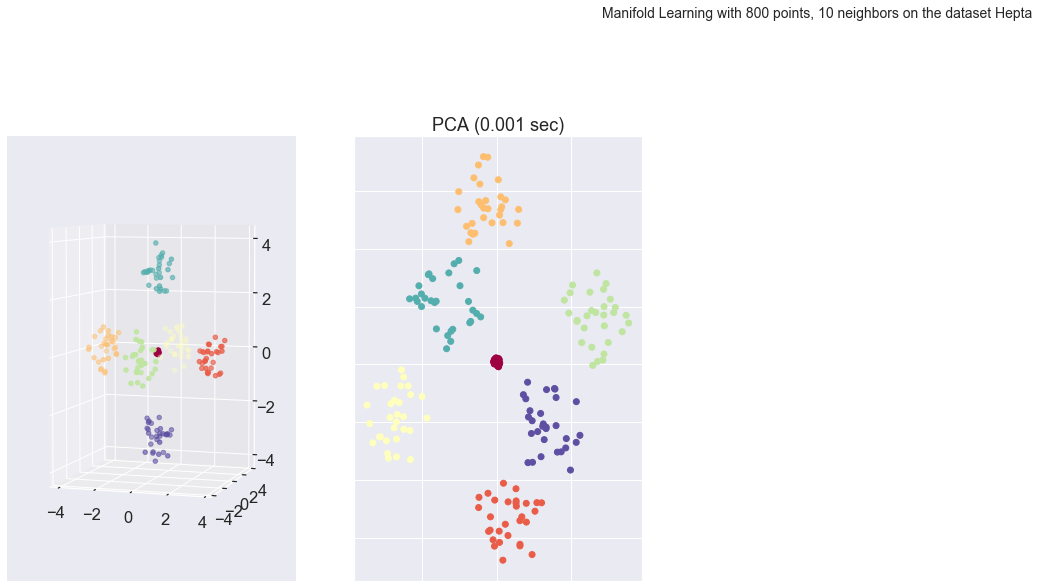

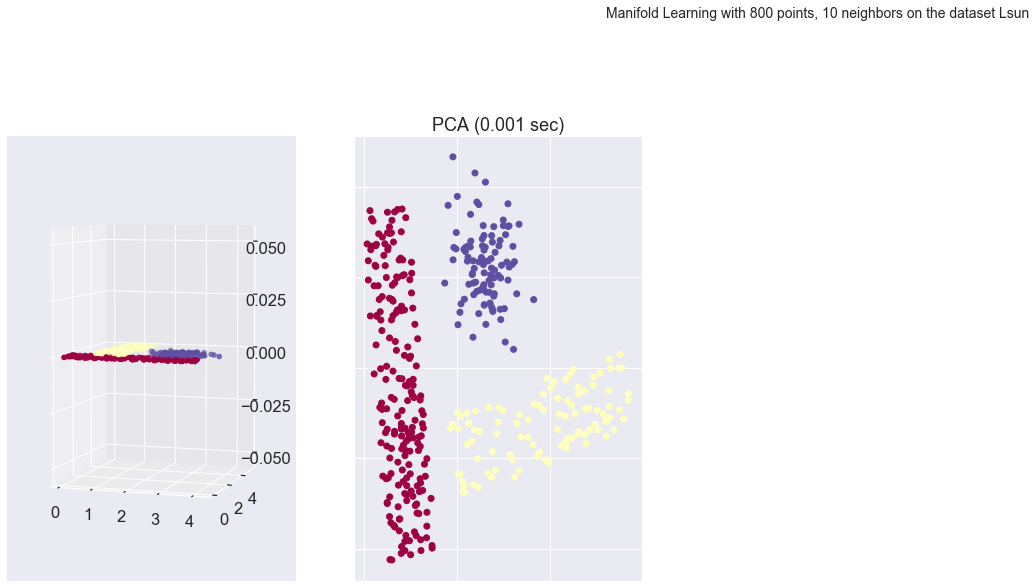

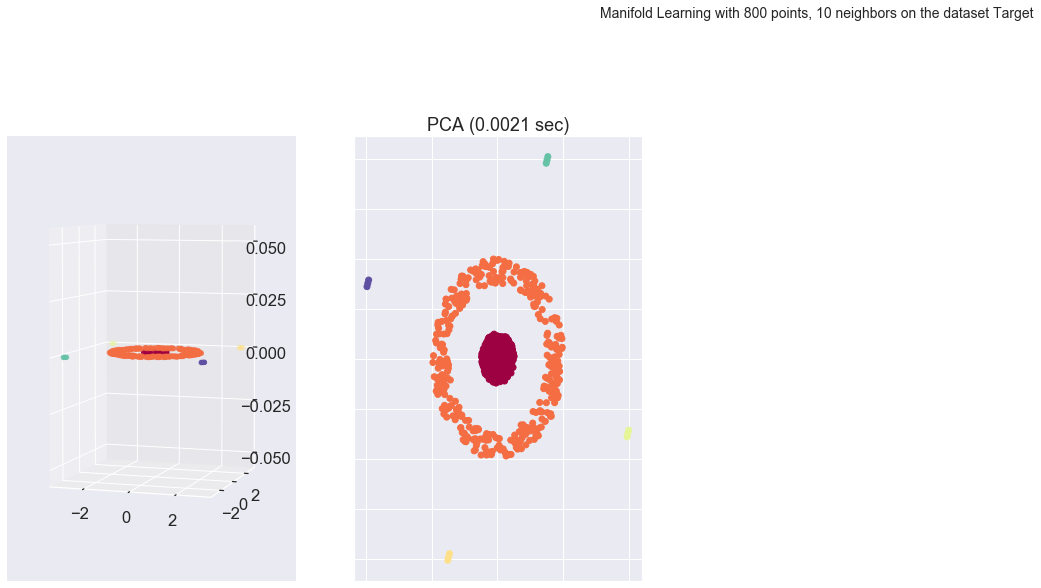

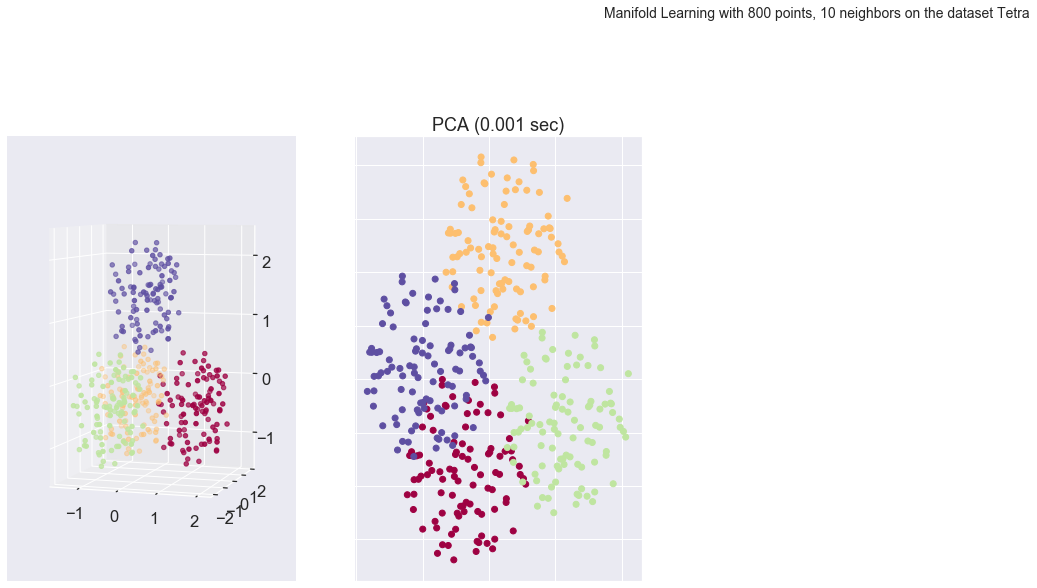

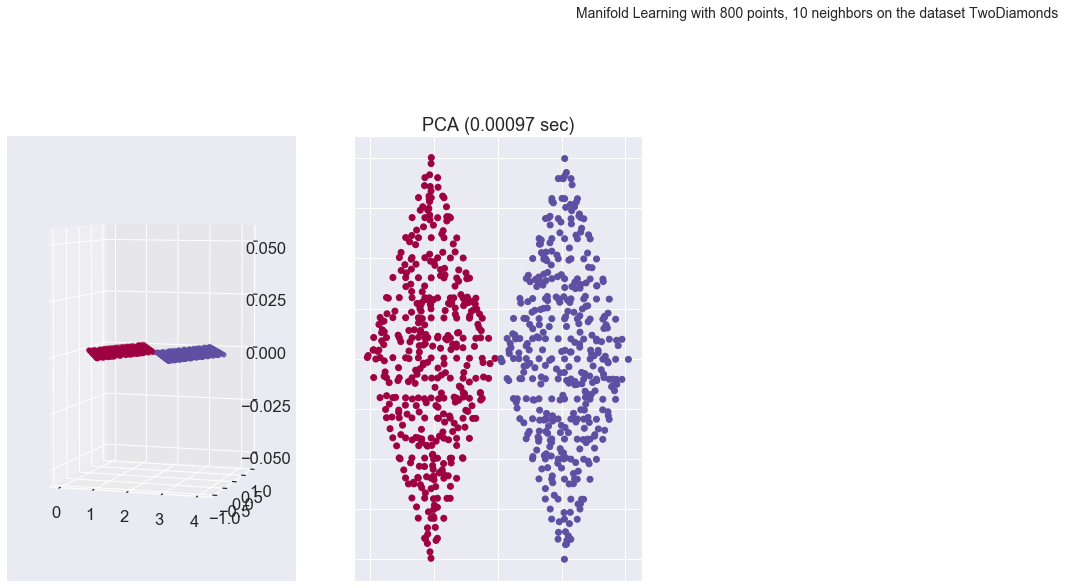

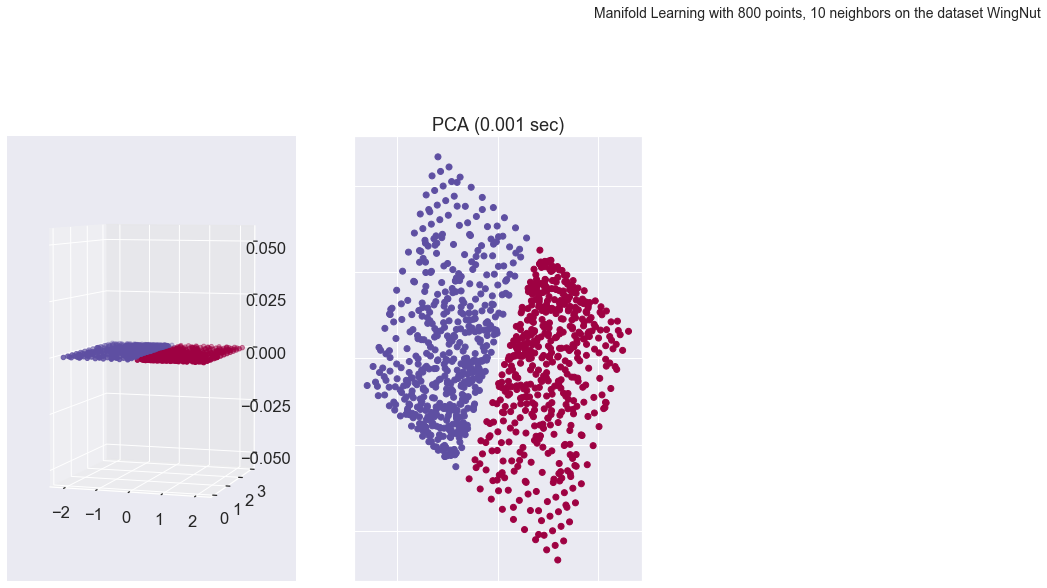

In [4]:
for nom in liste_dataset:
    chemin='D:/m2/reduc/{}.csv'.format(nom)
    
    dataset=pd.read_csv(chemin) 
    if(dataset.shape[1]==4):
        X=dataset.iloc[:,1:3]
        label=dataset.iloc[:,3].values
    else:
        X=dataset.iloc[:,1:4]
        label=dataset.iloc[:,4].values
        

    n_neighbors=10
    n_components=2
    fig = plt.figure(figsize=(30, 18))
    
    plt.suptitle("Manifold Learning with %i points, %i neighbors on the dataset %s"
             % (800, n_neighbors,nom), fontsize=14)


    ax = fig.add_subplot(251, projection='3d')
    if(dataset.shape[1]==4):
        ax.scatter(X.iloc[:,0].values, X.iloc[:,1].values, c=label, cmap=plt.cm.Spectral)
    else:
         ax.scatter(X.iloc[:,0].values, X.iloc[:,1].values, X.iloc[:,2].values, c=label, cmap=plt.cm.Spectral)   
    ax.view_init(4, -72)
    t0 = time()
    method='standard'
    Y = PCA(n_components=2).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (method, t1 - t0))

    ax = fig.add_subplot(252 )
    plt.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
    plt.title("PCA (%.2g sec)" % ( t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())